In [1]:
import numpy as np
import sys
import glob 
import os 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio
from scipy import stats
from natsort import natsorted, ns
import statistics as st
import pickle

In [2]:
def ModeBaselineZscoreF(F,Fneu, a = 0.7, deg = 5, binSize = 3000):
    
    """Function in order to calculate the baseline of suite2p extracted fluo traces using mode and noise level
    approximation"""
    
    binSize =int(binSize)
    test = F - a*Fneu
    xts = []
    yts = []
    
    
    for tm in range(int(binSize/2),int((len(test)-binSize/2)),int(binSize)):
        xts.append(tm)
        winMode = int(stats.mode(test[int((tm-binSize/2)):int((tm+binSize/2))])[0])
        yts.append(winMode)
        
    p = np.polyfit(np.array(xts),np.array(yts),deg)
    
    bas = np.polyval(p,np.arange(len(test)))
    
    Fsub = test - bas
    
    
   
    sigma = np.std(np.concatenate((Fsub[Fsub>np.mean(Fsub)],-1*Fsub[Fsub<np.mean(Fsub)]),axis = 0))
    
    Fbas = Fsub/sigma
        
    return Fbas

In [3]:
name = 'GF201'

In [4]:
print('Calculating mouse: ' + name )

mouseName = name
nframes = 211

# Hardcoded paths to the server
datapath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\DataAll\\' + mouseName + "\\" 
readingpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\' + mouseName + "\\" 
serverpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\Imaging\\'
behavpath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\data\\' + mouseName + '\\Recordings\\BehaviourFiles\\'

# Detect the operating system to fix the slashes

if (os.name == "posix"):
    print("Linux or MacOS system detected")

    #Play with the names only important for MacOS

    datapath= datapath.replace('\\','/')
    datapath = '/Volumes/' + datapath[18:] 
    behavpath = behavpath.replace('\\','/')
    behavpath = '/Volumes' + behavpath[18:] 
    serverpath = serverpath.replace('\\','/')
    serverpath = '/Volumes' + serverpath[18:] 

else:
    print("Windows system detected")

# Find the imaging days
imaging_days = glob.glob(os.path.join(behavpath, "GF*"))

for n,f in enumerate(imaging_days):
    imaging_days[n] = os.path.basename(f)

# Sort the imaging days by year and month in case the order is not correct
year = []
month = []
for i,f in enumerate(imaging_days):
    year.append(f[-4:])
    month.append(f[-6:-4])

yearZip = []
yearZip = natsorted(list(zip(year,imaging_days)))
year_sorted = [x for y, x in yearZip]


year = []
month = []
for i,f in enumerate(year_sorted):
    year.append(f[-4:])
    month.append(f[-6:-4])


monthZip = []
monthZip = natsorted(list(zip(month,year_sorted)))
month_sorted = [x for y, x in monthZip]


imaging_days = natsorted(month_sorted)

if name == 'GF207':

    print('Mouse ' + name + ' big correction needed')

    imaging_days_cor = [imaging_days[0], imaging_days[1], imaging_days[3], imaging_days[5], imaging_days[6],imaging_days[7]] 

    imaging_days = imaging_days_cor

elif name == 'GF187':

    print('Mouse ' + name + ' big correction needed')

    imaging_days = imaging_days[:-1]


# Thats a list of dictionaries where all the days for one mouse will be stored
AllData = []

DaysLength = np.zeros([1, len(imaging_days)])

for i,f in enumerate(imaging_days):

    frames_path = serverpath + imaging_days[i] + os.sep + 'TrialFrames.mat'

    print('Loading frames for splitting: ' + frames_path)

    frames = sio.loadmat(frames_path)

    numOfFrames = frames['NumOfFrames']

    numOfFrames = np.array(numOfFrames)

    DaysLength[0,i] = np.sum(numOfFrames)

#Create the paths to the suite2p files

F_path = datapath + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "F.npy"
Fneu_path = datapath + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "Fneu.npy"
iscell_path = datapath + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "iscell.npy"
spks_path = datapath  + os.sep + 'suite2p' + os.sep + 'plane0' + os.sep + "spks.npy"

print('Loading suite2p files ...')

FAll = np.load(F_path)
FneuAll = np.load(Fneu_path)
spksAll = np.load(spks_path)
iscell = np.load(iscell_path)

print('Files loaded')

#Keep only the ROIs detected as cells 

FAll = FAll[iscell[:,0]==1.]
FneuAll = FneuAll[iscell[:,0]==1.]
spksAll = spksAll[iscell[:,0]==1.]

for d in range(DaysLength.shape[1]):
    F = FAll[:,int(np.sum(DaysLength[0,0:d])):int(np.sum(DaysLength[0,0:(d+1)]))]
    Fneu = FneuAll[:,int(np.sum(DaysLength[0,0:d])):int(np.sum(DaysLength[0,0:(d+1)]))]
    spks = spksAll[:,int(np.sum(DaysLength[0,0:d])):int(np.sum(DaysLength[0,0:(d+1)]))]
    Fbas = np.empty([F.shape[0],F.shape[1]])
    spksbas =  np.empty([spks.shape[0],spks.shape[1]])



Calculating mouse: GF201
Windows system detected
Loading frames for splitting: \\sv1files.epfl.ch\Petersen-Lab\data\GF201\Recordings\Imaging\GF201_05092019\TrialFrames.mat
Loading frames for splitting: \\sv1files.epfl.ch\Petersen-Lab\data\GF201\Recordings\Imaging\GF201_06092019\TrialFrames.mat
Loading frames for splitting: \\sv1files.epfl.ch\Petersen-Lab\data\GF201\Recordings\Imaging\GF201_07092019\TrialFrames.mat
Loading frames for splitting: \\sv1files.epfl.ch\Petersen-Lab\data\GF201\Recordings\Imaging\GF201_08092019\TrialFrames.mat
Loading frames for splitting: \\sv1files.epfl.ch\Petersen-Lab\data\GF201\Recordings\Imaging\GF201_09092019\TrialFrames.mat
Loading frames for splitting: \\sv1files.epfl.ch\Petersen-Lab\data\GF201\Recordings\Imaging\GF201_10092019\TrialFrames.mat
Loading suite2p files ...
Files loaded


In [6]:
DaysLength.shape[1]

6

In [7]:
FAll.shape

(428, 675362)

In [15]:
F = FAll[:,int(np.sum(DaysLength[0,0:d])):int(np.sum(DaysLength[0,0:(d+1)]))]
Fneu = FneuAll[:,int(np.sum(DaysLength[0,0:d])):int(np.sum(DaysLength[0,0:(d+1)]))]
spks = spksAll[:,int(np.sum(DaysLength[0,0:d])):int(np.sum(DaysLength[0,0:(d+1)]))]
Fbas = np.empty([F.shape[0],F.shape[1]])
spksbas =  np.empty([spks.shape[0],spks.shape[1]])

In [14]:
d = 3

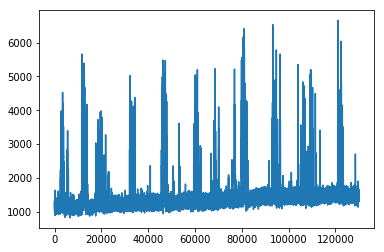

In [16]:
plt.plot(F[0,:])

In [32]:
Fbas[0][:] = ModeBaselineZscoreF(F[0,:],Fneu[0,:],0.7,3,3000)

In [20]:
Fbas[0][:].shape

(130004,)

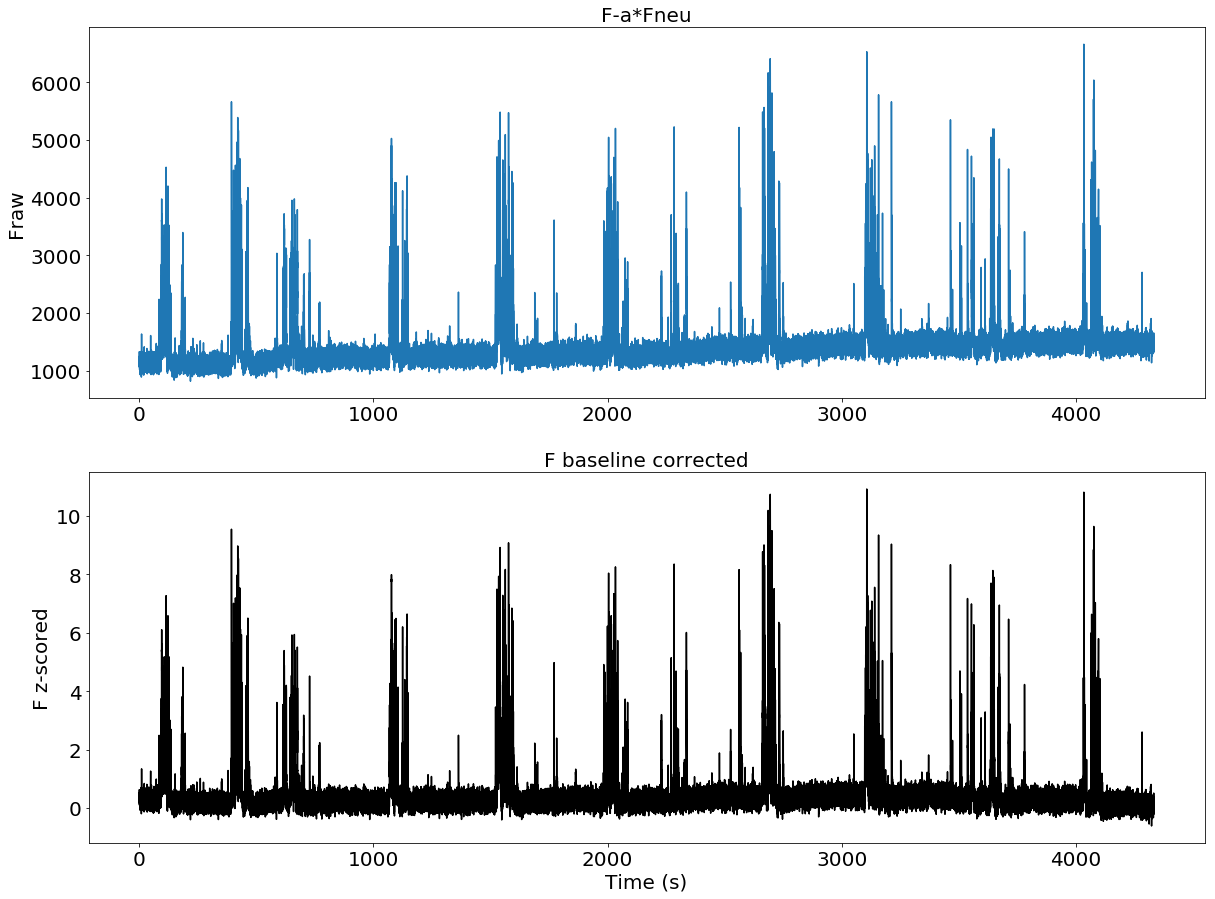

In [56]:
time = np.array(range(Fbas[0][:].shape[0]))/30
plt.figure(figsize=(20, 15))
plt.subplot(2,1,1)
plt.plot(time,F[0,:])
plt.ylabel('Fraw',fontsize=20)
plt.title('F-a*Fneu',fontsize=20)
plt.subplot(2,1,2)
plt.plot(time,Fbas[0][:],'k')
plt.title('F baseline corrected',fontsize=20)
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel('F z-scored',fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 